# Phân tích cổ phiếu FPT - Bài tập 1: Hiểu dữ liệu

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [16]:
# Đọc dữ liệu
price = pd.read_excel(r'C:\Users\ducmi\OneDrive\Desktop\(Khó)Khai phá và phân tích dữ liệu\Bài tập lập trình 1\Data sets\Simplize_FPT_PriceHistory_20250315.xlsx', skiprows=5)
financial_raw = pd.read_excel(r'C:\Users\ducmi\OneDrive\Desktop\(Khó)Khai phá và phân tích dữ liệu\Bài tập lập trình 1\Data sets\Simplize_FPT_FinancialIndicator_20250315.xlsx', skiprows=6)

## 1. Quan sát và hiểu dữ liệu

In [17]:
# Thống kê mô tả Price History
print('THỐNG KÊ BẢNG PRICE HISTORY:')
print(f'Shape: {price.shape}')
price_cols = ['GIÁ ĐÓNG CỬA', 'THAY ĐỔI GIÁ', '% THAY ĐỔI', 'KHỐI LƯỢNG']
desc_price = price[price_cols].describe()
desc_price.loc['variance'] = price[price_cols].var()
print(desc_price)

THỐNG KÊ BẢNG PRICE HISTORY:
Shape: (1007, 8)
          GIÁ ĐÓNG CỬA  THAY ĐỔI GIÁ  % THAY ĐỔI    KHỐI LƯỢNG
count     1.000000e+03  5.470000e+02  547.000000  1.000000e+03
mean      7.871540e+04  1.634369e+02    0.001674  3.058941e+06
std       3.204558e+04  1.627268e+03    0.014091  2.184421e+06
min       3.854807e+04 -7.900000e+03   -0.051499  2.210000e+05
25%       5.636836e+04 -6.000000e+02   -0.006156  1.538375e+06
50%       6.202803e+04  1.000000e+02    0.000746  2.553581e+06
75%       9.558450e+04  9.000000e+02    0.008226  3.851300e+06
max       1.543000e+05  7.800000e+03    0.069457  1.609400e+07
variance  1.026919e+09  2.648001e+06    0.000199  4.771696e+12


In [18]:
# Thống kê mô tả Financial Indicator
print('\nTHỐNG KÊ BẢNG FINANCIAL INDICATOR:')
print(f'Shape: {financial_raw.shape}')
print(f'Quarters: {len([c for c in financial_raw.columns if "Q" in str(c)])}')
print(f'Metrics: {len(financial_raw)}')


THỐNG KÊ BẢNG FINANCIAL INDICATOR:
Shape: (69, 41)
Quarters: 40
Metrics: 69


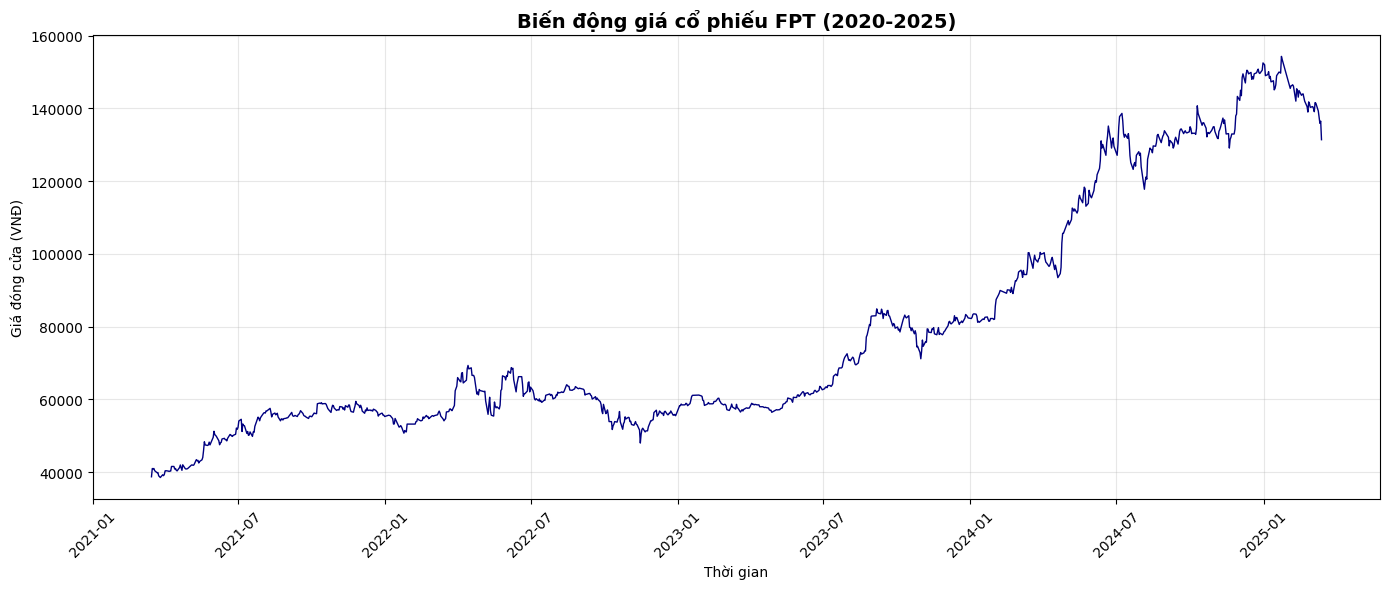

Giá cao nhất: 154,300 VNĐ
Giá thấp nhất: 38,548 VNĐ
Biên độ: 115,752 VNĐ


In [19]:
# Vẽ biểu đồ giá cổ phiếu
price['NGÀY'] = pd.to_datetime(price['NGÀY'], format='%d/%m/%Y', errors='coerce')
price = price.dropna(subset=['NGÀY'])
price_sorted = price.sort_values('NGÀY')

plt.figure(figsize=(14, 6))
plt.plot(price_sorted['NGÀY'], price_sorted['GIÁ ĐÓNG CỬA'], linewidth=1, color='navy')
plt.title('Biến động giá cổ phiếu FPT (2020-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"Giá cao nhất: {price_sorted['GIÁ ĐÓNG CỬA'].max():,.0f} VNĐ")
print(f"Giá thấp nhất: {price_sorted['GIÁ ĐÓNG CỬA'].min():,.0f} VNĐ")
print(f"Biên độ: {price_sorted['GIÁ ĐÓNG CỬA'].max() - price_sorted['GIÁ ĐÓNG CỬA'].min():,.0f} VNĐ")

## 2. Tiền xử lý dữ liệu - Tạo bảng theo quý

In [20]:
# Tính giá trung bình theo quý (±14 ngày)
quarter_ends = [
    ('2021-Q1', '2021-03-31'), ('2021-Q2', '2021-06-30'), 
    ('2021-Q3', '2021-09-30'), ('2021-Q4', '2021-12-31'),
    ('2022-Q1', '2022-03-31'), ('2022-Q2', '2022-06-30'), 
    ('2022-Q3', '2022-09-30'), ('2022-Q4', '2022-12-31'),
    ('2023-Q1', '2023-03-31'), ('2023-Q2', '2023-06-30'), 
    ('2023-Q3', '2023-09-30'), ('2023-Q4', '2023-12-31'),
    ('2024-Q1', '2024-03-31'), ('2024-Q2', '2024-06-30'), 
    ('2024-Q3', '2024-09-30'), ('2024-Q4', '2024-12-31'),
]

quarterly_prices = []
for quarter, end_date in quarter_ends:
    end = pd.to_datetime(end_date)
    start = end - pd.Timedelta(days=14)
    finish = end + pd.Timedelta(days=14)
    mask = (price_sorted['NGÀY'] >= start) & (price_sorted['NGÀY'] <= finish)
    q_data = price_sorted[mask]
    if not q_data.empty:
        quarterly_prices.append({
            'Quý': quarter.replace('-', '/'),
            'Giá đóng cửa TB': q_data['GIÁ ĐÓNG CỬA'].mean(),
            'KLGD TB': q_data['KHỐI LƯỢNG'].mean()
        })

df_price = pd.DataFrame(quarterly_prices)
df_price['Thay đổi giá'] = df_price['Giá đóng cửa TB'].diff()
df_price['% Thay đổi'] = df_price['Giá đóng cửa TB'].pct_change() * 100

In [21]:
# Chuyển đổi financial data sang format theo quý
metrics_map = {
    'Biên lợi nhuận gộp': 'Biên lợi nhuận gộp',
    'Biên lợi nhuận ròng': 'Biên lợi nhuận ròng', 
    'P/E': 'P/E',
    'EPS (VNĐ)': 'EPS',
    'Tăng trưởng EPS': 'Tăng trưởng EPS',
    'ROE': 'ROE',
    'Nợ phải trả/Vốn chủ sở hữu': 'Nợ phải trả/Vốn CSH',
    'Khả năng thanh toán tổng quát': 'Thanh toán tổng quát',
    'Vòng quay tài sản': 'Vòng quay tài sản',
    'Giá trị sổ sách': 'Giá trị sổ sách'
}

financial_data = []
quarters = [col for col in financial_raw.columns if 'Q' in str(col) and '/' in str(col)]

for quarter in quarters[:16]:  # Lấy 16 quý gần nhất
    q_dict = {'Quý': quarter}
    for metric_name, col_name in metrics_map.items():
        for idx, metric in enumerate(financial_raw['CHỈ TIÊU']):
            if pd.notna(metric) and metric_name in str(metric):
                val = financial_raw.loc[idx, quarter]
                try:
                    q_dict[col_name] = float(val) if pd.notna(val) else np.nan
                except:
                    q_dict[col_name] = np.nan
                break
    financial_data.append(q_dict)

df_financial = pd.DataFrame(financial_data)

In [28]:
# ...existing code...

# Chuẩn hóa cột Quý về dạng 'Qx/YYYY'
def to_quarter_format(q):
    # Nếu đã đúng dạng thì giữ nguyên
    if isinstance(q, str) and '/' in q and q.startswith('Q'):
        return q
    # Nếu dạng 'YYYY/Qx' thì chuyển thành 'Qx/YYYY'
    if isinstance(q, str) and '/' in q and q[0:4].isdigit():
        y, qtr = q.split('/')
        return f"{qtr}/{y}"
    return q

df_price['Quý'] = df_price['Quý'].apply(to_quarter_format)
df_financial['Quý'] = df_financial['Quý'].apply(to_quarter_format)

# Merge lại
df_merged = pd.merge(df_price, df_financial, on='Quý', how='inner')
print('BẢNG DỮ LIỆU MỚI (5 dòng đầu):')
print(df_merged.head())
print(f'\nShape: {df_merged.shape}')
# ...existing code...

BẢNG DỮ LIỆU MỚI (5 dòng đầu):
       Quý  Giá đóng cửa TB       KLGD TB  Thay đổi giá  % Thay đổi  \
0  Q1/2021     40156.955945  2.510579e+06           NaN         NaN   
1  Q2/2021     51186.021001  3.446247e+06  11029.065056   27.464893   
2  Q3/2021     56491.780683  2.920128e+06   5305.759682   10.365642   
3  Q4/2021     55527.497568  1.816589e+06   -964.283115   -1.706944   
4  Q1/2022     62114.900873  3.723836e+06   6587.403305   11.863317   

   Biên lợi nhuận gộp  Biên lợi nhuận ròng        P/E  Tăng trưởng EPS  \
0              0.3815               0.1517  16.531037           0.0477   
1              0.3981               0.1458  18.294494          -0.0169   
2              0.3726               0.1575  22.057422           0.0460   
3              0.3825               0.1457  21.794512           0.1514   
4              0.4063               0.1581  19.313467           0.1310   

      ROE  Thanh toán tổng quát  Vòng quay tài sản  Giá trị sổ sách  
0  0.2482              1.79

## 3. Phân tích tương quan

In [29]:
# Tính tương quan Pearson
numeric_cols = df_merged.select_dtypes(include=[np.number]).columns
correlations = df_merged[numeric_cols].corr()['Giá đóng cửa TB'].sort_values(ascending=False)

print('TƯƠNG QUAN PEARSON VỚI GIÁ CỔ PHIẾU:')
print('='*45)
for col, corr in correlations.items():
    if col != 'Giá đóng cửa TB' and not pd.isna(corr):
        print(f'{col:30} {corr:>7.3f}')

TƯƠNG QUAN PEARSON VỚI GIÁ CỔ PHIẾU:
P/E                              0.823
Vòng quay tài sản                0.689
ROE                              0.608
KLGD TB                          0.595
Thanh toán tổng quát             0.593
Thay đổi giá                     0.585
Giá trị sổ sách                  0.580
% Thay đổi                       0.316
Tăng trưởng EPS                  0.091
Biên lợi nhuận ròng             -0.036
Biên lợi nhuận gộp              -0.378


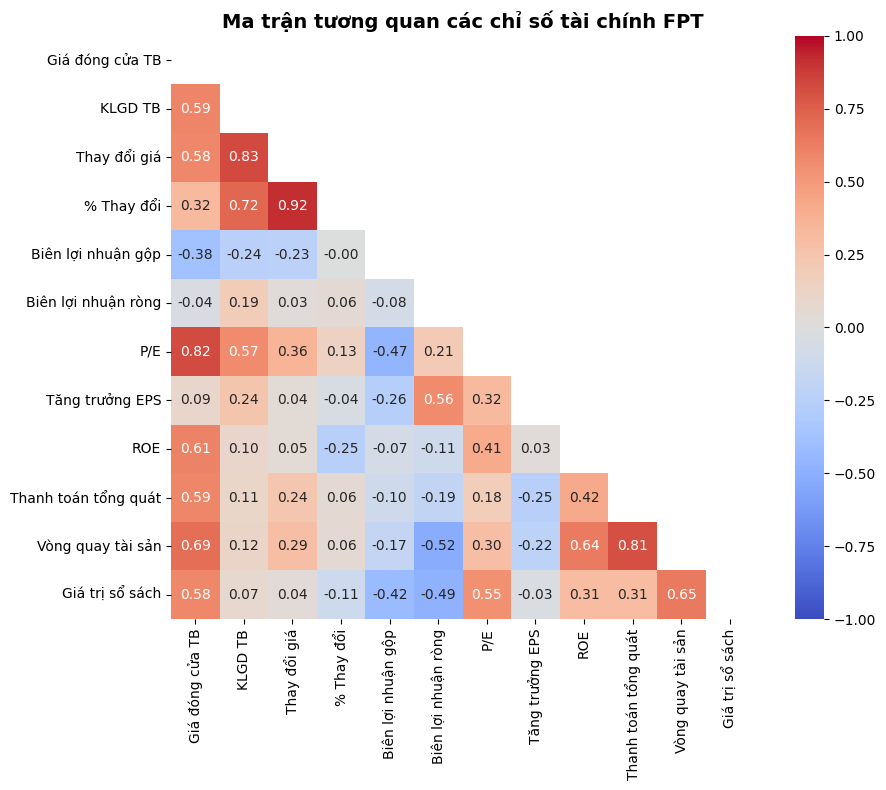

In [30]:
# Ma trận tương quan
plt.figure(figsize=(10, 8))
corr_matrix = df_merged[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, mask=mask, vmin=-1, vmax=1, square=True)
plt.title('Ma trận tương quan các chỉ số tài chính FPT', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [31]:
# Xác định yếu tố tương quan mạnh
strong = correlations[abs(correlations) > 0.5]
strong = strong[strong.index != 'Giá đóng cửa TB']

print('\nYẾU TỐ TƯƠNG QUAN MẠNH (|r| > 0.5):')
print('='*45)
for factor, corr in strong.items():
    if not pd.isna(corr):
        direction = 'Thuận' if corr > 0 else 'Nghịch'
        print(f'{factor:25} {corr:>7.3f} ({direction})')


YẾU TỐ TƯƠNG QUAN MẠNH (|r| > 0.5):
P/E                         0.823 (Thuận)
Vòng quay tài sản           0.689 (Thuận)
ROE                         0.608 (Thuận)
KLGD TB                     0.595 (Thuận)
Thanh toán tổng quát        0.593 (Thuận)
Thay đổi giá                0.585 (Thuận)
Giá trị sổ sách             0.580 (Thuận)


## 4. Kết luận

In [32]:
print('KẾT LUẬN PHÂN TÍCH CỔ PHIẾU FPT:')
print('='*60)
print(f'• Giá dao động: {price["GIÁ ĐÓNG CỬA"].min():,.0f} - {price["GIÁ ĐÓNG CỬA"].max():,.0f} VNĐ')
print(f'• Độ lệch chuẩn: {price["GIÁ ĐÓNG CỬA"].std():,.0f} VNĐ')
print(f'• Hệ số biến thiên: {(price["GIÁ ĐÓNG CỬA"].std()/price["GIÁ ĐÓNG CỬA"].mean())*100:.1f}%')

# Top factors
top_factors = correlations[1:4]
if len(top_factors) > 0:
    print('\n• Top chỉ số ảnh hưởng:')
    for i, (col, corr) in enumerate(top_factors.items(), 1):
        if not pd.isna(corr):
            print(f'  {i}. {col}: r = {corr:.3f}')

print('\n• Nhận xét: Giá cổ phiếu FPT có mối tương quan với các chỉ số')
print('  tài chính nội tại, đặc biệt là hiệu quả hoạt động và lợi nhuận.')

KẾT LUẬN PHÂN TÍCH CỔ PHIẾU FPT:
• Giá dao động: 38,548 - 154,300 VNĐ
• Độ lệch chuẩn: 32,046 VNĐ
• Hệ số biến thiên: 40.7%

• Top chỉ số ảnh hưởng:
  1. P/E: r = 0.823
  2. Vòng quay tài sản: r = 0.689
  3. ROE: r = 0.608

• Nhận xét: Giá cổ phiếu FPT có mối tương quan với các chỉ số
  tài chính nội tại, đặc biệt là hiệu quả hoạt động và lợi nhuận.
